<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<br>  
<p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p>
<p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p>
    
<br>
<br>   
<br>
<br>


<h1 style="text-align: center"> Information Retrieval & Data Mining </h1>
<h1 style="text-align: center"> Final Project </h1> 
 
<br>
<br>


<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2006</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Bekdaulet Magadanov,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Akzhurek Askarbek, Merey Orazaly</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Olzhas Uikas, Arsen Amanzholov</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Zhanat Karashbayeva</p>

<br>
<br>

<p style="text-align: center; font-size: 18px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

### Outline:
1. Explore the dataset. Do the descriptive statistics.       
2. Explanatory data analysis. Exploring the features, visualizations etc. (https:// www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/ exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/ learning/what-is-exploratory-data-analysis/ )
3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. (https://www.kaggle.com/learn/feature-engineering, https:// www.kaggle.com/learn/data-cleaning )
4. Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc..
5. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.
6. Conclusion.


**Dataset Description:**
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender) 
- test_set.csv - no need to use.

**Transactions.csv columns description:**
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15) - code - transaction code
- type - transaction type
- sum - sum of transaction

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

## 1. Explore the dataset. Do the descriptive statistics.

In [2]:
#Load and observe datasets
transactions = pd.read_csv('transactions.csv', sep=';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [4]:
codes = pd.read_csv('codes.csv', sep=";")
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
types = pd.read_csv('types.csv', sep=';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [7]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
train = pd.read_csv('train_set.csv', sep=';')
train.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [10]:
# number of clients
print("Number of clients:", transactions.client_id.nunique())

Number of clients: 8656


In [11]:
# number of completed transactions
print("Number of completed transactions:",transactions.code.nunique())

Number of completed transactions: 175


In [12]:
# Combine all datasets into one df
t1 = transactions.merge(train, how='left', on='client_id').copy()
t2 = t1.merge(types, how='left', on='type').copy()
transaction = t2.merge(codes, how='left', on='code').copy() 
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,NaN,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,NaN,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [13]:
# The shape of transaction table
transaction.shape

(130039, 8)

**Comment: There are data about 130.039 transactions that were done in bank with different information such as client id, datetime, sum, gender (target) and others.**

In [14]:
# Drop the rows where we have no data (н/д - нет данных)
print("The number of 'н/д' rows:", len(transaction[transaction.type_description == 'н/д']))
transaction.drop(transaction[transaction.type_description == 'н/д'].index, inplace=True)

transaction.shape

The number of 'н/д' rows: 122


(129917, 8)

In [15]:
# fill NaN values in the target column
# first we sort the column, then we fill in the nulls with the values of the previous row
transaction.target = transaction.sort_values(by='client_id').target.fillna(method='ffill')

In [16]:
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [17]:
#separating a sequence of days from the datetime column
days_hour = [i for i in transaction.datetime.str.split(' ')]
days = [days_hour[i][0] for i in range(len(days_hour))]
days = [int(i) for i in days]

In [18]:
#creation a real date with corresponding days
year_w_d = pd.date_range(end = '2021-01-01', periods = max(days)+1).tolist()
year_w_d

[Timestamp('2019-10-03 00:00:00', freq='D'),
 Timestamp('2019-10-04 00:00:00', freq='D'),
 Timestamp('2019-10-05 00:00:00', freq='D'),
 Timestamp('2019-10-06 00:00:00', freq='D'),
 Timestamp('2019-10-07 00:00:00', freq='D'),
 Timestamp('2019-10-08 00:00:00', freq='D'),
 Timestamp('2019-10-09 00:00:00', freq='D'),
 Timestamp('2019-10-10 00:00:00', freq='D'),
 Timestamp('2019-10-11 00:00:00', freq='D'),
 Timestamp('2019-10-12 00:00:00', freq='D'),
 Timestamp('2019-10-13 00:00:00', freq='D'),
 Timestamp('2019-10-14 00:00:00', freq='D'),
 Timestamp('2019-10-15 00:00:00', freq='D'),
 Timestamp('2019-10-16 00:00:00', freq='D'),
 Timestamp('2019-10-17 00:00:00', freq='D'),
 Timestamp('2019-10-18 00:00:00', freq='D'),
 Timestamp('2019-10-19 00:00:00', freq='D'),
 Timestamp('2019-10-20 00:00:00', freq='D'),
 Timestamp('2019-10-21 00:00:00', freq='D'),
 Timestamp('2019-10-22 00:00:00', freq='D'),
 Timestamp('2019-10-23 00:00:00', freq='D'),
 Timestamp('2019-10-24 00:00:00', freq='D'),
 Timestamp

In [19]:
transaction['Time'] = [year_w_d[j] for i in range(len(days)) for j in range(max(days)+1) if days[i] == j]

In [20]:
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,Time
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-27
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-14
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-27
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-22
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-03-02


**We have divided the column 'Sum' to income & spendings, because it's more logical and comfortable to work with transactions in such way. Income is positive values, when client funded a bank account, Spending is negative values, when withdraw money from a bank account.**

In [21]:
#Divide the column sum to income and spending, replace NAN values with 0s
transaction['income'] = transaction['sum'].where(transaction['sum'] > 0) 
transaction['spending'] = transaction['sum'].where(transaction['sum'] <= 0)
transaction = transaction.replace(np.nan, 0)

### Descriptive statistics has two types: 

- Measures of central tendency (mean, median, mode, quartiles)
- Measures of dispersion (standard deviation, variance, range)

In [22]:
# There are a lot of 0 values in our data because one person makes different transactions
income = transaction[transaction.income > 0].income
spending = transaction[transaction.spending < 0].spending

In [23]:
print('Average income of clients: ', round(np.mean(income), 2))
print('Average spendings of clients: ', round(np.mean(spending), 2))
print('-' * 50)
print('Mode of income: ', income.mode())
print('Mode of spendings: ', spending.mode())
print('-' * 50)
print('Median of income: ', round(np.median(income), 2))
print('Median of spending: ', round(np.median(spending), 2))
print('-' * 50)
print('Standard deviation of income of clients: ', round(np.std(income), 2))
print('Standard deviation of spendings of clients: ', round(np.std(spending), 2))

Average income of clients:  172174.28
Average spendings of clients:  -61913.13
--------------------------------------------------
Mode of income:  0    22459.16
dtype: float64
Mode of spendings:  0   -2245.92
dtype: float64
--------------------------------------------------
Median of income:  22459.16
Median of spending:  -8983.66
--------------------------------------------------
Standard deviation of income of clients:  1081321.27
Standard deviation of spendings of clients:  323390.12


**Using quartiles we can identify and count the number of outliers.**

In [24]:
Q1 = income.quantile(0.25)
Q3 = spending.quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outlier =[]
for x in income:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('There are', len(outlier), 'outlier incomes.')

There are 24311 outlier incomes.


In [25]:
Q1 = spending.quantile(0.25)
Q3 = spending.quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outlier =[]
for x in spending:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('There are', len(outlier), 'outlier spendings.')

There are 16512 outlier spendings.


## 2. Exploratory data analysis. Exploring the features, visualizations

**In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics often with visual methods. As we have already explored the datasets, let's visualize them.**

### Visualization №1

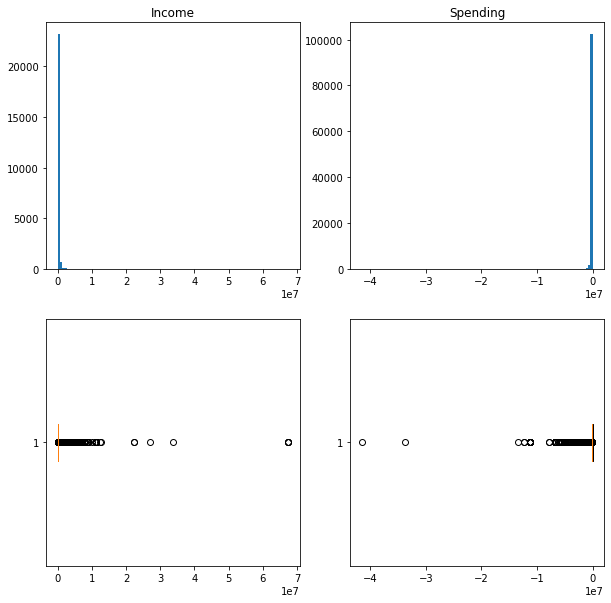

In [26]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(10,10))

ax[0,0].set_title('Income')
ax[0,1].set_title('Spending')

ax[0,0].hist(income, 100);
ax[1,0].boxplot(income, vert=False);

ax[0,1].hist(spending, 100);
ax[1,1].boxplot(spending, vert=False);

**Comment:** These histograms and boxplots illustrates the outliers of income and spendings. There we can see that for income we have positive values, starting from 0, and for spending is vice versa. 

### Visualization №2

In [27]:
df_v2 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().head()
df_v2.head()

,code_description,code
0,Финансовые институты — снятие наличности автом...,27917
1,Финансовые институты — снятие наличности вручную,18684
2,"Звонки с использованием телефонов, считывающих...",18641
3,"Бакалейные магазины, супермаркеты",18467
4,Денежные переводы,11355


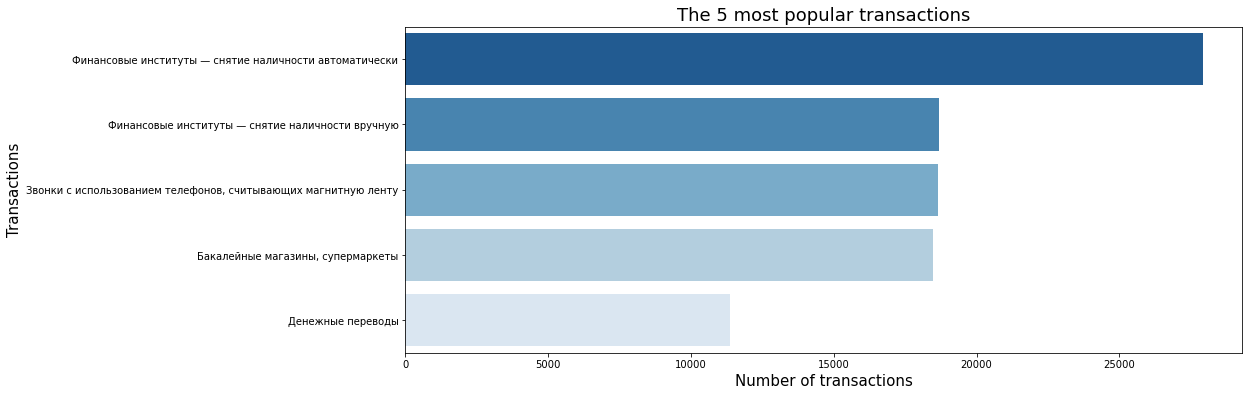

In [28]:
#Visualisation with horizontal bar plot using seaborn
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = "Blues_r", data=df_v2)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most popular transactions',  size = 18)
plt.show()

**Comment:** This horizontal barchart shows the 5 most popular transactions. To do this, we have grouped our transactions  by  code_description  and sorted by descending order. As we can see, the most popular transaction is "Финансовые институты — снятие наличности автоматически", which has almost 28000 transactions. Hence, we can conclude that people prefer automatic process of cash withdrawal. 

### Visualization №3

In [29]:
df_v3 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().tail()
df_v3

,code_description,code
170,Нефть и нефтепродукты,1
171,Почтовые услуги — только правительство,1
172,Агенты и менеджеры по аренде недвижимости,1
173,Разнообразные издательства/печатное дело,1
174,"Генеральные подрядчики по вентиляции, теплосна...",1


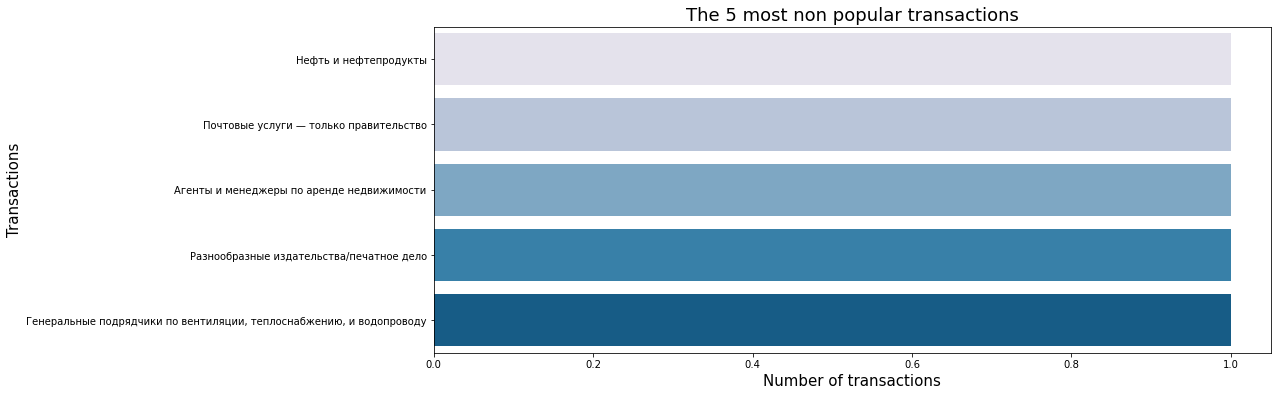

In [30]:
#Visualisation with horizontal bar plot using seaborn
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = 'PuBu', data=df_v3)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most non popular transactions',  size = 18)
plt.show()

### Visualization №4

In [31]:
popular_tranc = transaction[transaction.code_description=="Финансовые институты — снятие наличности автоматически"] 
popular_tranc.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,Time,income,spending
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-27,0.00,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-14,67377.47,0.00
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-27,0.00,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-22,0.00,-3368873.66
15,2444292,355 09:47:45,6011,2010,-65131.56,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-09-22,0.00,-65131.56


In [32]:
#Extract years from date by saving them into a new column 
popular_tranc['year'] = pd.DatetimeIndex(popular_tranc['Time']).year
popular_tranc['year']

<ipython-input-32-2338b3e029a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_tranc['year'] = pd.DatetimeIndex(popular_tranc['Time']).year


0         2020
1         2020
2         2019
3         2020
15        2020
          ... 
130012    2020
130016    2020
130027    2020
130028    2020
130032    2020
Name: year, Length: 27917, dtype: int64

In [33]:
df_v33 = popular_tranc.groupby("year")["code"].sum().reset_index()
df_v33 = popular_tranc.rename(columns = {"sum":"code"})
df_v33 = df_v33.sort_values(by = "year", ascending = True)

In [34]:
counts = df_v33.groupby(['year'])['client_id'].count()
counts

year
2019     5224
2020    22645
2021       48
Name: client_id, dtype: int64

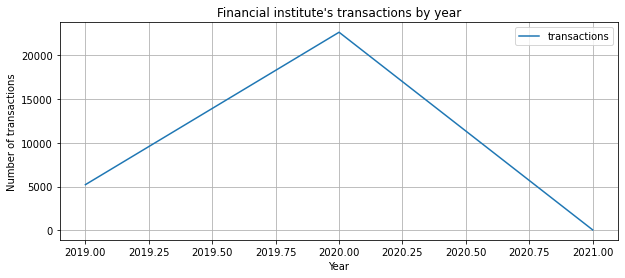

In [35]:
#Visualization of linear plot
plt.figure(figsize=(10,4))
plt.plot(counts.index, counts.values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.title("Financial institute's transactions by year")
plt.legend(["transactions"])
plt.show()

**Comment:** This is a linear plot of Financial institute's transactions by year. As we can see, most of the transactions were done in 2020 and the minimum number of transactions were in 2021, because it's new year.

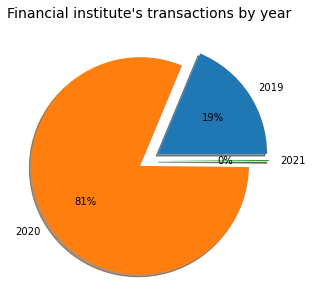

In [36]:
#Visualisation with pie chart using mathpotlib
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(counts.values, labels = counts.index, explode = (0.1, 0.1, 0.1), autopct='%1.0f%%',shadow=True)
ax.set_title("Financial institute's transactions by year", size = 14)
plt.show()

**Comment:** The above pie chart shows the distribution of transactions in Financial institute, from previous illustration we can say that obviously 80%+ of transactions would be in 2020. And almost 0% of transactions in 2021.  

## 3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. 

### RFM Analysis

**Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.**

In [37]:
rfm = transaction.groupby(by='client_id', as_index=False).Time.max()
rfm['Frequency'] =  transaction.groupby(by='client_id').Time.count().values
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'max_spending'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'min_spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'min_income'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'max_income'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'income'})
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [38]:
rfm.fillna(0, inplace=True)
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [39]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min()

client_id
22899         -8759.07
27914         -2245.92
28753      -1392467.78
31385        -56147.89
38084       -224591.58
               ...    
99967537    -336887.37
99984336    -179673.26
99985917    -224591.58
99991245     -67377.47
99999680    -449183.15
Name: sum, Length: 8577, dtype: float64

In [40]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max()

client_id
22899        -1122.96
27914        -2245.92
28753        -3368.87
31385         -291.97
38084          -44.92
              ...    
99967537   -336887.37
99984336   -179673.26
99985917   -224591.58
99991245    -16574.86
99999680     -1527.22
Name: sum, Length: 8577, dtype: float64

In [41]:
range_tranc = pd.date_range(start=transaction.Time.min(),end = transaction.Time.max(), periods = 4).tolist()
range_tranc

[Timestamp('2019-10-03 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2021-01-01 00:00:00')]

In [42]:
rfm['recent_range'] = pd.cut(rfm.Time.values, 
                     range_tranc, 
                     right=False, 
                     labels=['давние клиенты', 
                             'относительно недавние клиенты', 
                             'недавние клиенты'])

In [43]:
rfm.groupby(by='recent_range').Time.count()

recent_range
давние клиенты                    205
относительно недавние клиенты     601
недавние клиенты                 7566
Name: Time, dtype: int64

<AxesSubplot:xlabel='Frequency'>

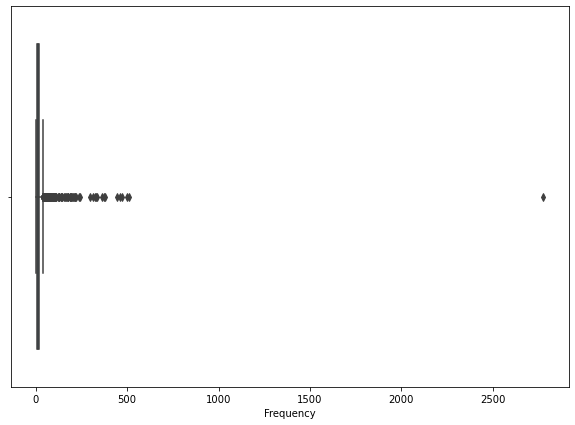

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rfm, x=rfm.Frequency)

In [45]:
Q3 = np.percentile(rfm.Frequency, 75)
Q1 = np.percentile(rfm.Frequency, 25)
IQR = Q3-Q1
pos_out = Q3 + 1.5*IQR
pos_out

40.0

In [46]:
r = math.ceil(pos_out/3)
conditions = [
    (rfm.Frequency < r),
    (rfm.Frequency >= r) & (rfm.Frequency < 2*r),
    (rfm.Frequency >= 2*r) & (rfm.Frequency <= pos_out) | (rfm.Frequency > pos_out)
    ]

values = ['делает тран очень редко', 
          'делает тран нечасто',
          'делает тран часто']

rfm['frequency_range'] = np.select(conditions, values)

In [47]:
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,недавние клиенты,делает тран очень редко
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,относительно недавние клиенты,делает тран очень редко
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,недавние клиенты,делает тран очень редко
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,недавние клиенты,делает тран очень редко
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,недавние клиенты,делает тран нечасто


In [48]:
rfm.groupby(by='frequency_range').Frequency.count()

frequency_range
делает тран нечасто        2440
делает тран очень редко    5241
делает тран часто           975
Name: Frequency, dtype: int64

<AxesSubplot:xlabel='spending'>

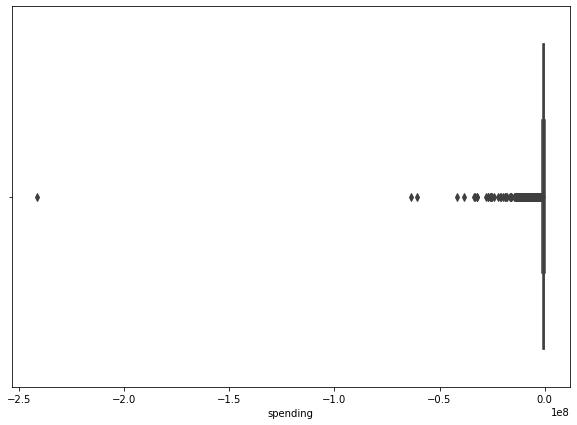

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rfm, x=rfm.spending)

In [50]:
Q3 = np.percentile(rfm.spending, 75)
Q1 = np.percentile(rfm.spending, 25)
IQR = Q3 - Q1
neg_out = Q1 - 1.5*IQR
neg_out

-1442779.2262499998

In [51]:
r = math.ceil(neg_out/3)
conditions = [
    (rfm.spending > r),
    (rfm.spending <= r) & (rfm.spending > 2*r),
    (rfm.spending <= 2*r) & (rfm.spending >= neg_out) | (rfm.spending < neg_out)
    ]

values = ['минус маленькая сумма', 
          'минус средняя сумма',
          'минус большая сумма']

rfm['minus_amount'] = np.select(conditions, values)

In [52]:
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,недавние клиенты,делает тран очень редко,минус маленькая сумма
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,относительно недавние клиенты,делает тран очень редко,минус маленькая сумма
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,недавние клиенты,делает тран очень редко,минус большая сумма
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,недавние клиенты,делает тран очень редко,минус маленькая сумма
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,недавние клиенты,делает тран нечасто,минус большая сумма


In [53]:
rfm.minus_amount.value_counts()

минус маленькая сумма    5904
минус большая сумма      1420
минус средняя сумма      1332
Name: minus_amount, dtype: int64

<AxesSubplot:xlabel='income'>

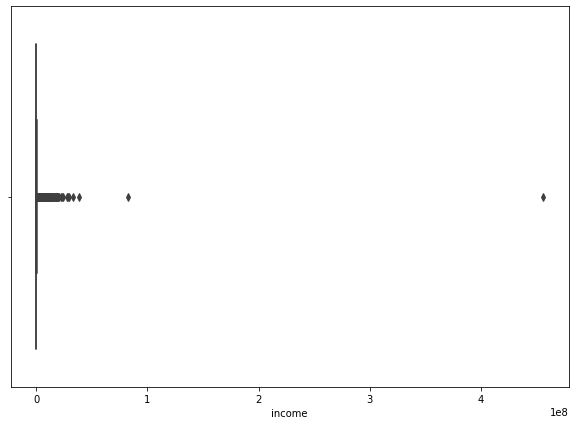

In [54]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rfm, x=rfm.income)

In [55]:
Q3 = np.percentile(rfm.income, 75)
Q1 = np.percentile(rfm.income, 25)
IQR = Q3 - Q1
pos_out = Q3 + 1.5*IQR
pos_out

564988.2125

In [56]:
r = math.ceil(pos_out/3)
conditions = [
    (rfm.income < r),
    (rfm.income >= r) & (rfm.income < 2*r),
    (rfm.income >= 2*r) & (rfm.income <= pos_out) | (rfm.income > pos_out)
    ]

values = ['plus маленькая сумма', 
          'plus средняя сумма',
          'plus большая сумма']

rfm['plus_amount'] = np.select(conditions, values)

In [57]:
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,относительно недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,недавние клиенты,делает тран очень редко,минус большая сумма,plus большая сумма
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,недавние клиенты,делает тран нечасто,минус большая сумма,plus большая сумма


In [58]:
rfm.plus_amount.value_counts()

plus маленькая сумма    6243
plus большая сумма      1638
plus средняя сумма       775
Name: plus_amount, dtype: int64

In [59]:
re = {'давние клиенты':1, 
      'относительно недавние клиенты':2, 
      'недавние клиенты':3}

fr = {'делает тран очень редко':1, 
      'делает тран нечасто':2,
      'делает тран часто':3}

mi = {'минус маленькая сумма':3, 
      'минус средняя сумма':2,
      'минус большая сумма':1}

pl = {'plus маленькая сумма':1, 
      'plus средняя сумма':2,
      'plus большая сумма':3}

rfm['re_range'] = rfm.recent_range.map(re)
rfm['fre_range'] = rfm.frequency_range.map(fr)
rfm['min_amount'] = rfm.minus_amount.map(mi)
rfm['pl_amount'] = rfm.plus_amount.map(pl)
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,3,1,3,1
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,относительно недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,2,1,3,1
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,недавние клиенты,делает тран очень редко,минус большая сумма,plus большая сумма,3,1,1,3
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,3,1,3,1
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,недавние клиенты,делает тран нечасто,минус большая сумма,plus большая сумма,3,2,1,3


In [60]:
# the worst clients (1111)
rfm[(rfm.re_range == 1) & (rfm.fre_range==1) & (rfm.min_amount==1) & (rfm.pl_amount==1)]

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
158,1798485,2019-11-15,7,-3368873.66,-5614.79,0.0,0.0,-3635531.24,0.0,давние клиенты,делает тран очень редко,минус большая сумма,plus маленькая сумма,1,1,1,1
2896,34179937,2020-01-29,2,-1684436.83,-26411.97,0.0,0.0,-1710848.80,0.0,давние клиенты,делает тран очень редко,минус большая сумма,plus маленькая сумма,1,1,1,1
6955,80698386,2019-11-03,2,-761365.45,-224591.58,0.0,0.0,-985957.03,0.0,давние клиенты,делает тран очень редко,минус большая сумма,plus маленькая сумма,1,1,1,1
7596,88062408,2020-01-17,1,-1122957.89,-1122957.89,0.0,0.0,-1122957.89,0.0,давние клиенты,делает тран очень редко,минус большая сумма,plus маленькая сумма,1,1,1,1


In [61]:
# the best clients (3333)
rfm[(rfm.re_range == 3) & (rfm.fre_range==3) & (rfm.min_amount==3) & (rfm.pl_amount==3)]

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
557,6506523,2020-12-25,53,-52734.10,-1122.96,875.91,898366.31,-247463.08,2883216.82,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
675,7927145,2020-12-31,39,-404264.84,-314.43,269.51,197640.59,-474791.12,523073.80,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
817,9605096,2020-12-28,30,-67377.47,-673.77,2245.92,774840.94,-270178.07,781017.21,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
845,9978856,2020-12-31,29,-29196.91,-449.18,112295.79,628856.42,-172620.43,1327336.23,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
921,10909988,2020-12-01,35,-67152.88,-673.77,224591.58,449183.15,-333835.17,673774.73,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
932,11089937,2020-12-27,28,-67377.47,-1122.96,11229.58,190902.84,-290668.21,487363.72,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
1144,13587967,2020-10-30,29,-89836.63,-1179.11,673774.73,673774.73,-469823.59,673774.73,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
1161,13775509,2020-12-18,29,-51633.60,-154.97,11229.58,381805.68,-193661.28,460412.74,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
1542,18139443,2020-12-25,28,-112295.79,-235.82,56147.89,669507.49,-351097.29,725655.38,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3
1641,19409011,2020-12-05,33,-40426.48,-473.66,2270.85,449183.15,-281114.97,451454.00,недавние клиенты,делает тран часто,минус маленькая сумма,plus большая сумма,3,3,3,3


In [86]:
transaction.groupby(by='client_id').agg(pd.Series.mode).target

client_id
22899       1.0
27914       1.0
28753       0.0
31385       0.0
38084       0.0
           ... 
99967537    1.0
99984336    1.0
99985917    0.0
99991245    1.0
99999680    1.0
Name: target, Length: 8656, dtype: float64

In [87]:
rfm = rfm.merge(transaction.groupby(by='client_id').agg(pd.Series.mode).target, how='left', on='client_id')
rfm.head()

,client_id,Time,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount,target
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,3,1,3,1,1.0
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,относительно недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,2,1,3,1,1.0
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,недавние клиенты,делает тран очень редко,минус большая сумма,plus большая сумма,3,1,1,3,0.0
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,недавние клиенты,делает тран очень редко,минус маленькая сумма,plus маленькая сумма,3,1,3,1,0.0
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,недавние клиенты,делает тран нечасто,минус большая сумма,plus большая сумма,3,2,1,3,0.0


## 4. Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc.

In [173]:
train.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


**Comment:** In test_set.csv there are no target values. So, we define by yourself this.

In [174]:
print('train_set', train.shape)

train_set (6000, 2)


Man 0.557
Woman 0.443


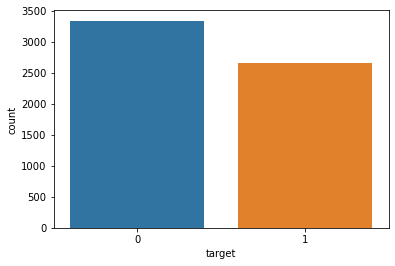

In [175]:
sns.countplot(x='target', data=train)
n = train.loc[:,'target'].value_counts()[0] + train.loc[:,'target'].value_counts()[1]
print('Man', np.round(train.loc[:,'target'].value_counts()[0]/n, 3))
print('Woman', np.round(train.loc[:,'target'].value_counts()[1]/n, 3))

**Comment:** It is balanced.

## Desicion Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
%matplotlib inline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rfm.loc[:,'re_range':'pl_amount'], rfm.target, test_size=0.25, random_state=2022)

In [157]:
model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 5, random_state = 2022).fit(X_train, y_train)
print("Accuracy on training set: %.3f" %(model.score(X_train, y_train))) 
print("Accuracy on test set: %.3f"%(model.score(X_test, y_test)))

Accuracy on training set: 0.574
Accuracy on test set: 0.574


[Text(111.60000000000001, 195.696, 'min_amount <= 1.5\ngini = 0.493\nsamples = 6279\nvalue = [3523, 2756]'),
 Text(55.800000000000004, 152.208, 'gini = 0.497\nsamples = 981\nvalue = [450, 531]'),
 Text(167.4, 152.208, 'min_amount <= 2.5\ngini = 0.487\nsamples = 5298\nvalue = [3073, 2225]'),
 Text(111.60000000000001, 108.72, 'gini = 0.496\nsamples = 965\nvalue = [525, 440]'),
 Text(223.20000000000002, 108.72, 'pl_amount <= 1.5\ngini = 0.484\nsamples = 4333\nvalue = [2548, 1785]'),
 Text(167.4, 65.232, 'fre_range <= 2.5\ngini = 0.482\nsamples = 3537\nvalue = [2106, 1431]'),
 Text(111.60000000000001, 21.744, 'gini = 0.481\nsamples = 3431\nvalue = [2051, 1380]'),
 Text(223.20000000000002, 21.744, 'gini = 0.499\nsamples = 106\nvalue = [55, 51]'),
 Text(279.0, 65.232, 'gini = 0.494\nsamples = 796\nvalue = [442, 354]')]

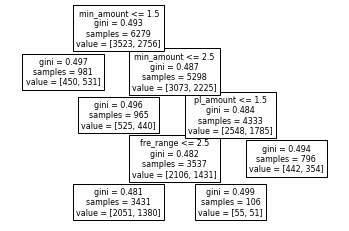

In [158]:
plot_tree(model, feature_names = X_train.columns)

In [96]:
rfm_st = rfm.loc[:,'Frequency':'spending']
rfm_st = (rfm_st-rfm_st.mean())/np.std(rfm_st)
rfm_st.head()

,Frequency,max_spending,min_spending,min_income,max_income,spending
0,-0.276662,0.344606,0.175766,-0.162918,-0.181491,0.209330
1,-0.548594,0.352378,0.156894,-0.185357,-0.160088,0.218434
2,-0.059116,-1.306506,0.138021,2.021141,0.417799,-0.770367
3,-0.059116,0.288059,0.189732,-0.207796,-0.192192,0.182871
4,0.647908,0.087064,0.193884,-0.147959,0.717443,-0.101296


In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(rfm_st, rfm.target, test_size=0.25, random_state=2022)

In [98]:
model2 = DecisionTreeClassifier().fit(X_train2, y_train2)
print("Accuracy on training set: %.3f" %(model2.score(X_train2, y_train2))) 
print("Accuracy on test set: %.3f"%(model2.score(X_test2, y_test2)))

Accuracy on training set: 0.983
Accuracy on test set: 0.507


In [111]:
#plot_tree(model2, feature_names = X_train2.columns)

## Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=2022).fit(X_train, y_train)

print("Accuracy on training set: %.3f" %(model_rfc.score(X_train, y_train))) 
print("Accuracy on test set: %.3f"%(model_rfc.score(X_test, y_test)))

Accuracy on training set: 0.576
Accuracy on test set: 0.580


In [160]:
model_rfcs = RandomForestClassifier().fit(X_train2, y_train2)

print("Accuracy on training set: %.3f" %(model_rfcs.score(X_train2, y_train2))) 
print("Accuracy on test set: %.3f"%(model_rfcs.score(X_test2, y_test2)))

Accuracy on training set: 0.983
Accuracy on test set: 0.556


In [161]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_rfc,
                           param_grid={
                               'criterion':['gini', 'entropy'],
                               'max_depth': [5,10,20],
                               'min_samples_leaf': [5,10,20,50,100,200],
                               'n_estimators': [10,25,30,50,100],
                               'max_features': ['auto', 'sqrt', 'log2']
                           },
                           cv = 5,
                           return_train_score=True,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

In [162]:
grid_search.fit(X_train,y_train).cv_results_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'mean_fit_time': array([0.06473088, 0.16236124, 0.16886573, 0.21901183, 0.42514033,
        0.04370575, 0.12842903, 0.1274756 , 0.15500774, 0.41303234,
        0.04962745, 0.10402126, 0.13026524, 0.15261102, 0.30114241,
        0.03106132, 0.08986216, 0.09538627, 0.15353632, 0.30592561,
        0.03699245, 0.07629623, 0.09491701, 0.1550384 , 0.30513072,
        0.02981634, 0.09150391, 0.09709244, 0.14106655, 0.31611099,
        0.04059033, 0.09604874, 0.09957013, 0.15905457, 0.30712733,
        0.03166404, 0.07600923, 0.1058784 , 0.14218202, 0.30189619,
        0.03441863, 0.08848686, 0.09244318, 0.15459514, 0.35232892,
        0.03342972, 0.08232098, 0.12488999, 0.17757235, 0.47541132,
        0.03897495, 0.12910185, 0.1935544 , 0.22348685, 0.33392997,
        0.04008179, 0.07965932, 0.10023422, 0.20592299, 0.49466591,
        0.05930872, 0.12790403, 0.18160367, 0.25847564, 0.47183328,
        0.06493711, 0.13523121, 0.11759834, 0.14931474, 0.47895002,
        0.05474176, 0.14247942,

In [163]:
grid_search.fit(X_train,y_train).best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


RandomForestClassifier(max_depth=5, min_samples_leaf=200, n_estimators=10,
                       random_state=2022)

In [164]:
best_model1 = RandomForestClassifier(max_depth=20, 
                                 max_features='sqrt', 
                                 min_samples_leaf=200,
                                 n_estimators=10,
                                 random_state=1).fit(X_train, y_train)

[Text(418.5, 489.24, 'fre_range <= 1.5\ngini = 0.491\nsamples = 3960\nvalue = [3556, 2723]\nclass = 0'),
 Text(167.4, 380.52000000000004, 'min_amount <= 2.5\ngini = 0.487\nsamples = 2437\nvalue = [2238, 1626]\nclass = 0'),
 Text(83.7, 271.8, 'gini = 0.5\nsamples = 419\nvalue = [325, 326]\nclass = 1'),
 Text(251.10000000000002, 271.8, 'pl_amount <= 1.5\ngini = 0.482\nsamples = 2018\nvalue = [1913, 1300]\nclass = 0'),
 Text(167.4, 163.08000000000004, 're_range <= 2.5\ngini = 0.478\nsamples = 1756\nvalue = [1696, 1111]\nclass = 0'),
 Text(83.7, 54.360000000000014, 'gini = 0.464\nsamples = 324\nvalue = [328, 189]\nclass = 0'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.481\nsamples = 1432\nvalue = [1368, 922]\nclass = 0'),
 Text(334.8, 163.08000000000004, 'gini = 0.498\nsamples = 262\nvalue = [217, 189]\nclass = 0'),
 Text(669.6, 380.52000000000004, 'min_amount <= 2.5\ngini = 0.496\nsamples = 1523\nvalue = [1318, 1097]\nclass = 0'),
 Text(585.9, 271.8, 'pl_amount <= 1.5\ngini 

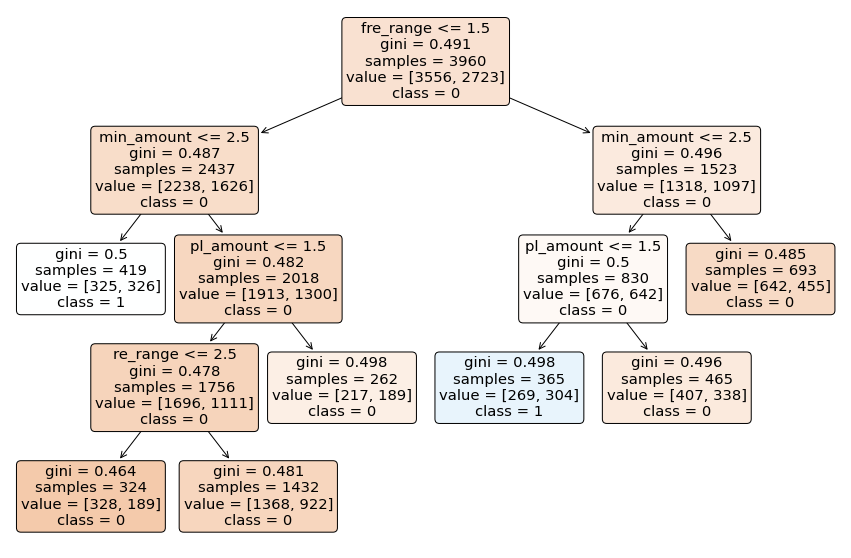

In [165]:
fig = plt.figure(figsize=(15, 10))
plot_tree(best_model1.estimators_[0], 
          feature_names=X_train.columns,
          class_names=['0','1'], 
          filled=True, impurity=True, 
          rounded=True)

In [166]:
grid_search.fit(X_train2,y_train2).cv_results_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'mean_fit_time': array([0.05855603, 0.14648619, 0.18229003, 0.27606268, 0.50980639,
        0.05009995, 0.12982407, 0.15696917, 0.25098925, 0.50977836,
        0.05074182, 0.12656207, 0.15662041, 0.25704646, 0.50742397,
        0.05909624, 0.12109537, 0.15187631, 0.2540451 , 0.49985576,
        0.05380859, 0.11967516, 0.14347553, 0.24598479, 0.48882704,
        0.05386782, 0.11453891, 0.13964677, 0.2281188 , 0.46496387,
        0.05937042, 0.13280988, 0.15818248, 0.27092156, 0.54494901,
        0.05804062, 0.13779545, 0.16838598, 0.2713922 , 0.54192867,
        0.0583611 , 0.13845849, 0.16870575, 0.26397023, 0.52949433,
        0.053758  , 0.13273568, 0.15642586, 0.26102648, 0.52502632,
        0.05546055, 0.13513103, 0.15602522, 0.25013347, 0.50891128,
        0.05061512, 0.11991258, 0.14626164, 0.24149017, 0.47091017,
        0.06647811, 0.14251461, 0.16467538, 0.26991181, 0.54270778,
        0.06275282, 0.13638897, 0.16452217, 0.27679901, 0.55464272,
        0.06494875, 0.13440895,

In [167]:
grid_search.fit(X_train2,y_train2).best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       n_estimators=25, random_state=2022)

In [168]:
best_model2 = RandomForestClassifier(max_depth=20, 
                                 max_features='sqrt', 
                                 min_samples_leaf=200,
                                 n_estimators=10,
                                 random_state=1).fit(X_train2, y_train2)

[Text(292.95, 513.4, 'max_spending <= 0.034\ngini = 0.491\nsamples = 3960\nvalue = [3556, 2723]\nclass = 0'),
 Text(125.55000000000001, 453.0, 'min_spending <= 0.184\ngini = 0.5\nsamples = 1047\nvalue = [809, 817]\nclass = 1'),
 Text(83.7, 392.6, 'spending <= -0.153\ngini = 0.499\nsamples = 806\nvalue = [597, 655]\nclass = 1'),
 Text(41.85, 332.2, 'gini = 0.492\nsamples = 312\nvalue = [227, 291]\nclass = 1'),
 Text(125.55000000000001, 332.2, 'min_spending <= 0.153\ngini = 0.5\nsamples = 494\nvalue = [370, 364]\nclass = 0'),
 Text(83.7, 271.8, 'gini = 0.498\nsamples = 202\nvalue = [135, 152]\nclass = 1'),
 Text(167.4, 271.8, 'gini = 0.499\nsamples = 292\nvalue = [235, 212]\nclass = 0'),
 Text(167.4, 392.6, 'gini = 0.491\nsamples = 241\nvalue = [212, 162]\nclass = 0'),
 Text(460.35, 453.0, 'min_spending <= -0.041\ngini = 0.484\nsamples = 2913\nvalue = [2747, 1906]\nclass = 0'),
 Text(418.5, 392.6, 'gini = 0.5\nsamples = 216\nvalue = [164, 168]\nclass = 1'),
 Text(502.20000000000005, 392.

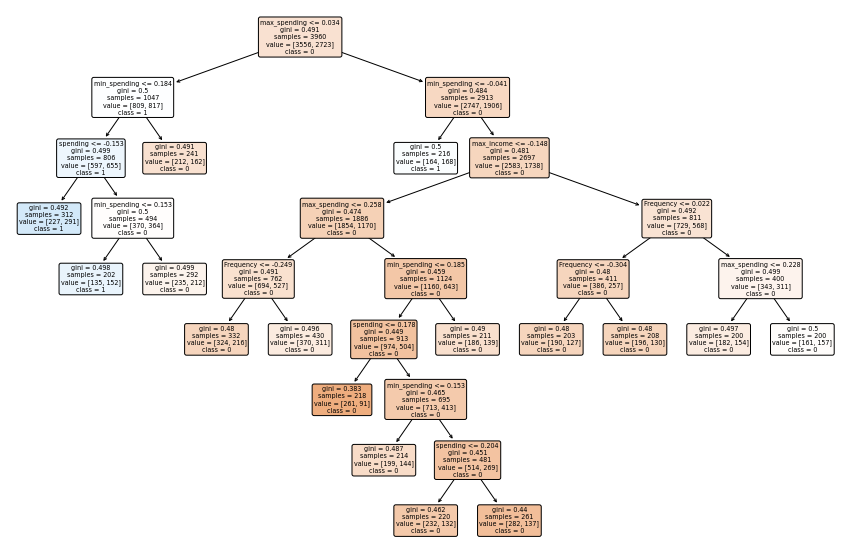

In [169]:
fig = plt.figure(figsize=(15, 10))
plot_tree(best_model2.estimators_[0], 
          feature_names=X_train2.columns,
          class_names=['0','1'], 
          filled=True, impurity=True, 
          rounded=True)

## K Nearest Neighbours

In [372]:
from sklearn.model_selection import train_test_split

X = rfm[['client_id','Frequency', 'max_spending', 'min_spending', 'max_income', 'spending', 'income']]
y = np.array(rfm.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2022)

**Comment:** Split dataset to train and test sets in order to create model.

In [373]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (6279, 7)
y_train (6279,)
X_test (2093, 7)
y_test (2093,)


In [374]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

**Comment:** When p=1 it is manhattan_distance and p=2 it is euclidean_distance 

In [375]:
y_pred = classifier.predict(X_test)
print('y_pred', y_pred.shape)

y_pred (2093,)


**Comment:** Predicting the y value with X_test value.

In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score
confm = confusion_matrix(y_test, y_pred)

In [377]:
print("Confusion Matrix:\n", confm)
print(f'Accuracy Score of KNN(K=3) method: {np.round(accuracy_score(y_test, y_pred), 3)}%')

Confusion Matrix:
 [[729 441]
 [513 410]]
Accuracy Score of KNN(K=3) method: 0.544%


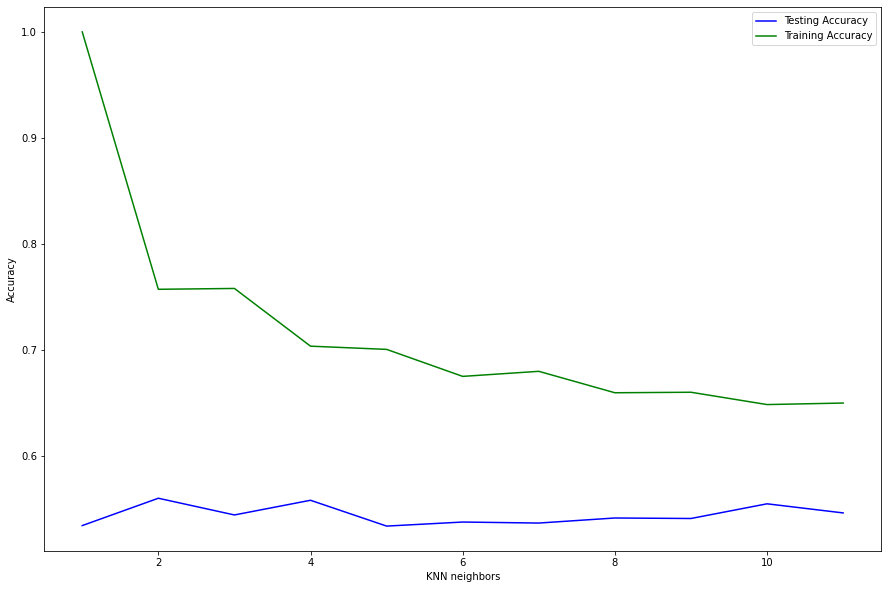

Best accuracy for KNN. It is 2 neighbors with value 0.56


In [378]:
knn_neighbors = np.arange(1, 12)
train_accuracy_score = []
test_accuracy_score = []

for i in knn_neighbors:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    train_accuracy_score.append(classifier.score(X_train, y_train))
    test_accuracy_score.append(classifier.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.plot(knn_neighbors, test_accuracy_score, label = 'Testing Accuracy', color = 'blue')
plt.plot(knn_neighbors, train_accuracy_score, label = 'Training Accuracy', color = 'green')
plt.legend()
plt.xlabel('KNN neighbors')
plt.ylabel('Accuracy')
plt.show()

max_testing_accuracy_score_value = max(test_accuracy_score)
max_testing_accuracy_score_index = test_accuracy_score.index(max_testing_accuracy_score_value) + 1
print(f'Best accuracy for KNN. It is {max_testing_accuracy_score_index} neighbors with value {np.round(max_testing_accuracy_score_value, 3)}')

**Comment:** ***Training accuracy*** means that identical values are used both for ***training*** and ***testing***, while ***test accuracy*** represents that the trained model identifies independent values that were not used in training.

#### Because the performance is still low, Let's try to use Hyperparameter Tuning to Improve Model Performance.
***Hyperparameter*** is a parameter of the model that is set before the start of learning process.

We will use the **Exhaustive Grid Search** technique for hyperparameter optimization.  An exhaustive grid search is a good way to determine the **best hyperparameter** values to use.

In [379]:
from sklearn.model_selection import GridSearchCV

**Comment:** We use three hyperparamters: metric, k-nearest neighbors, weights.

In [380]:
k_range = list(range(1, 13))
weights = ['uniform', 'distance']
metric = ['minkowski','euclidean','manhattan']
grid_parametres = dict(n_neighbors = k_range, weights = weights, metric = metric)

**Comment:**
***Uniform*** weight. All points in each neighborhood are weighted equally.
***Distance*** weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [381]:
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid_parametres, cv = 10, verbose = 1, n_jobs = -1)

**Comment:** ***verbose*** controls the verbosity: the higher, the more messages. 
When ***verbose == 1*** the computation time for each fold and parameter candidate is displayed.

***cv*** determines the cross-validation splitting strategy. The process of ***K-Fold Cross-Validation*** is straightforward. You divide the data into K folds. Out of the K folds, K-1 sets are used for training while the remaining set is used for testing. The algorithm is trained and tested K times, each time a new set is used as testing set while remaining sets are used for training.

***n_jobs*** number of jobs to run in parallel. ***n_jobs = -1*** means using all processors.

In [382]:
grid_res = grid.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [383]:
print('Best score', grid_res.best_score_)
print('Best parameters', grid_res.best_params_)

Best score 0.5629885004926909
Best parameters {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [395]:
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

**Comment:** Use best hyperparameters to improve model performance.

In [396]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test set accuracy: ',accuracy_score(y_test, y_test_pred))

Training set accuracy:  0.7614269788182831
Test set accuracy:  0.5532728141423794


In [397]:
print(confusion_matrix(y_test, y_test_pred))

[[959 211]
 [724 199]]


**Comment:** Compute confusion matrix to evaluate the accuracy of a classification.

In [398]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.82      0.67      1170
         1.0       0.49      0.22      0.30       923

    accuracy                           0.55      2093
   macro avg       0.53      0.52      0.49      2093
weighted avg       0.53      0.55      0.51      2093



**Comment:** Build a text report showing the main classification metrics.

In [399]:
from sklearn.model_selection import cross_val_score

scores_new = cross_val_score(knn, X, y, cv = 10)
print('Model accuracy of new: ', np.round(np.mean(scores_new), 3))

scores_old = cross_val_score(classifier, X, y, cv = 10)
print('Model accuracy of old: ', np.round(np.mean(scores_old), 3))

Model accuracy of new:  0.478
Model accuracy of old:  0.479


**Comment:** The accuracy can be improved by using more hyperparameters.

## 5. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.

### ROC/AUC

In [547]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [578]:
print('AUC scores:')

X_train, X_test, y_train, y_test = train_test_split(rfm.loc[:,'re_range':'pl_amount'], rfm.target, test_size=0.25, random_state=2022)
model_tree = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5, random_state=2022).fit(X_train, y_train)
probs_tree = model_tree.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_test, probs_tree) 
roc_auc_tree = auc(fpr1, tpr1)
print('Decision Tree =', roc_auc_tree)

model_rfc = RandomForestClassifier(random_state=2022).fit(X_train, y_train)
probs_rfc = model_rfc.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, probs_rfc) 
roc_auc_rfc = auc(fpr2, tpr2)
print('Random Forest =', roc_auc_rfc)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2022)
model_knn = KNeighborsClassifier(n_neighbors=3, metric = "euclidean", p = 2).fit(X_train, y_train)
probs_knn = knn.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds = roc_curve(y_test, probs_knn) 
roc_auc_knn = auc(fpr3, tpr3)
print('KNN =', roc_auc_knn)

AUC scores:
Decision Tree = 0.5766304599457363
Random Forest = 0.5577955570371604
KNN = 0.5474196923817726


**Comment:** Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

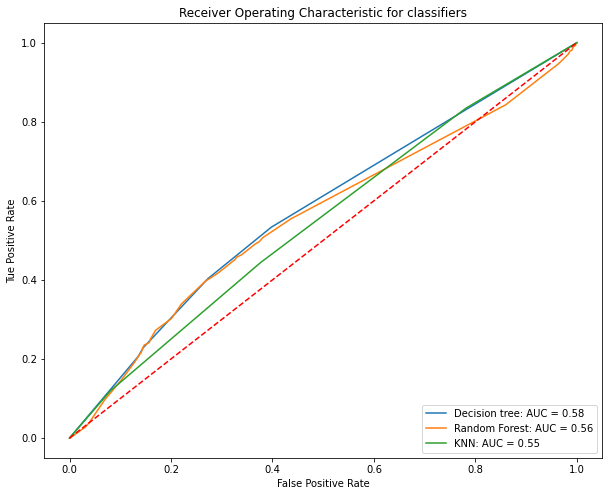

In [579]:
#Plot ROC curve
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr1, tpr1, label='Decision tree: AUC = %0.2f' % roc_auc_tree)
ax.plot(fpr2, tpr2, label='Random Forest: AUC = %0.2f' % roc_auc_rfc)
ax.plot(fpr3, tpr3, label='KNN: AUC = %0.2f' % roc_auc_knn)
plt.title('Receiver Operating Characteristic for classifiers')
plt.plot([0, 1], 'r--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('Tue Positive Rate')
ax.legend(loc='lower right')

**Comment:** 

The Higher AUC means the better the model is at distinguishing between genders with the females and males. Hence, the best classifier is Decision tree. When AUC is 0.58, it means there is a 58% chance that the model will be able to distinguish between positive class (man) and negative class (woman).

### Precision-Recall curves

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

X_train, X_test, y_train, y_test = train_test_split(rfm.loc[:,'re_range':'pl_amount'], rfm.target, test_size=0.25, random_state=2022)

precision_tree, recall_tree, threshold_tree = precision_recall_curve(y_test, model_tree.predict(X_test))
average_precision_tree = average_precision_score(y_test, model_tree.predict(X_test))
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

Text(0.5, 1.0, 'Decision Tree Precision-Recall curve: AP=0.46')

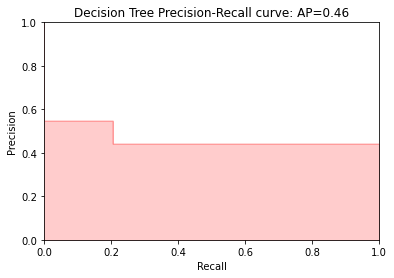

In [587]:
#Plot Precision-Recall curve
plt.step(recall_tree, precision_tree, color='r', alpha=0.2, where='post')
plt.fill_between(recall_tree, precision_tree, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Decision Tree Precision-Recall curve: AP={0:0.2f}'.format(average_precision_tree))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rfm.loc[:,'re_range':'pl_amount'], rfm.target, test_size=0.25, random_state=2022)

precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_test, model_tree.predict(X_test))
average_precision_forest = average_precision_score(y_test, model_rfc.predict(X_test))
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

Text(0.5, 1.0, 'Random Forest Precision-Recall curve: AP=0.47')

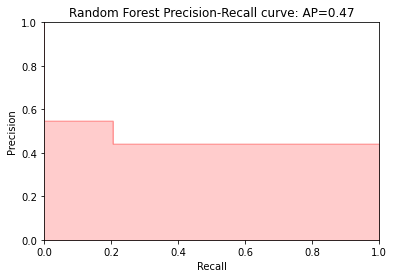

In [594]:
#Plot Precision-Recall curve
plt.step(recall_forest, precision_forest, color='r', alpha=0.2, where='post')
plt.fill_between(recall_forest, precision_forest, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Random Forest Precision-Recall curve: AP={0:0.2f}'.format(average_precision_forest))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2022)

precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_test, model_knn.predict(X_test))
average_precision_knn = average_precision_score(y_test, model_knn.predict(X_test))
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

Text(0.5, 1.0, 'KNN Precision-Recall curve: AP=0.46')

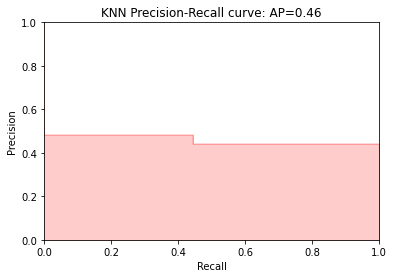

In [596]:
#Plot Precision-Recall curveplt.step(recall_knn, precision_knn, color='r', alpha=0.2, where='post')
plt.fill_between(recall_knn, precision_knn, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('KNN Precision-Recall curve: AP={0:0.2f}'.format(average_precision_knn))

**Comment:** Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class Man) and only a few examples of an event (class Woman). The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.

## 6. Conclusion

*We have used different methods to explore and get informaiton about transactions in bank account. With Explarotatory Data Analysis (EDA) we have visualized the popular/non popular transactions, get the picture of the popular Financial institute transaction. Using Recency, frequency, monetary value (RFM) we have identified the best & worst clients.* 

*In supervised learning, we have build different models (Decision Tree, Random Forest, KNN) based on the result of Unsupervised learning (RFM analysis). After building them, we have analyzed them with ROC-AUC curve and Precision-Recall curve.*

*The Higher AUC means the better the model is at distinguishing between genders with the females and males. Hence, the best classifier is Decision tree. When AUC is 0.58, it means there is a 58% chance that the model will be able to distinguish between positive class (man) and negative class (woman). For a balanced dataset, precision score is 0.5. As we also have balanced dataset, our score is near this value.*

*So, we can conclude that Decision tree is the best classifier to predict the model. ROC curves should be used when there are roughly equal numbers of observations for each class. Whereas Precision-Recall curves should be used when there is a moderate to large class imbalance. The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.*